In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime

In [2]:
import zipfile
with zipfile.ZipFile('md.zip', 'r') as zip_ref:
    zip_ref.extractall('marketdata')

In [3]:
from Simulator import run_simulation
from Strategies import ZeroStrategy, LGBM
from DataframePreparator import prepare_df

## ETH (fees = 0.04%)

In [4]:
df = pd.read_csv('marketdata/lob_ethusdt_Binance_Spot.csv')

In [5]:
df.columns

Index(['receive_ts', 'exchange_ts', 'ethusdt:Binance:Spot_ask_price_0',
       'ethusdt:Binance:Spot_ask_vol_0', 'ethusdt:Binance:Spot_bid_price_0',
       'ethusdt:Binance:Spot_bid_vol_0', 'ethusdt:Binance:Spot_ask_price_1',
       'ethusdt:Binance:Spot_ask_vol_1', 'ethusdt:Binance:Spot_bid_price_1',
       'ethusdt:Binance:Spot_bid_vol_1', 'ethusdt:Binance:Spot_ask_price_2',
       'ethusdt:Binance:Spot_ask_vol_2', 'ethusdt:Binance:Spot_bid_price_2',
       'ethusdt:Binance:Spot_bid_vol_2', 'ethusdt:Binance:Spot_ask_price_3',
       'ethusdt:Binance:Spot_ask_vol_3', 'ethusdt:Binance:Spot_bid_price_3',
       'ethusdt:Binance:Spot_bid_vol_3', 'ethusdt:Binance:Spot_ask_price_4',
       'ethusdt:Binance:Spot_ask_vol_4', 'ethusdt:Binance:Spot_bid_price_4',
       'ethusdt:Binance:Spot_bid_vol_4', 'ethusdt:Binance:Spot_ask_price_5',
       'ethusdt:Binance:Spot_ask_vol_5', 'ethusdt:Binance:Spot_bid_price_5',
       'ethusdt:Binance:Spot_bid_vol_5', 'ethusdt:Binance:Spot_ask_price_6',
    

### Retard strat (only hold 500 USD in asset)

In [6]:
logs = run_simulation(ZeroStrategy(prepare_df(df, mode='ethusdt'), 0.0004))

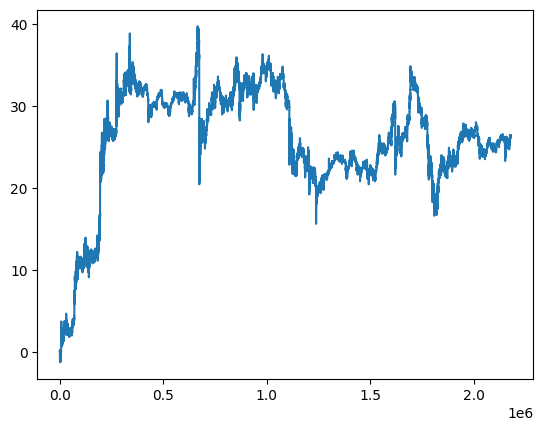

In [7]:
plt.plot(np.array(logs['pnl']))

In [8]:
logs.keys() # тут можно получить все графики

dict_keys(['usd_position', 'asset_position', 'pnl', 'price', 'cumulative_fees', 'time', 'volume(usd)', 'volume(asset)'])

### My strat

In [9]:
logs = run_simulation(LGBM(prepare_df(df, mode='ethusdt'), fees=0.0004))

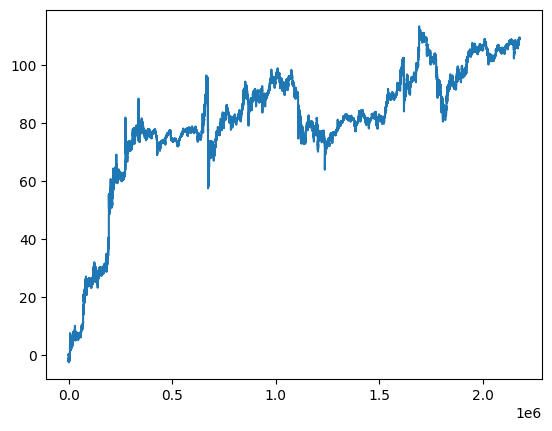

In [10]:
plt.plot(logs['pnl'])

In [22]:
np.diff(np.array(logs['pnl'])).std()

0.03106159974813202

In [29]:
def MaximumDrawdown(pnl):
    # = min(1 - pnl(i)/pnl(j)) : j > i
    Roll_Max = pnl.cummax()
    Drawdown = pnl/Roll_Max - 1
    return Drawdown.min()

MaximumDrawdown(pd.Series(logs['pnl']))

-15.14233804232537

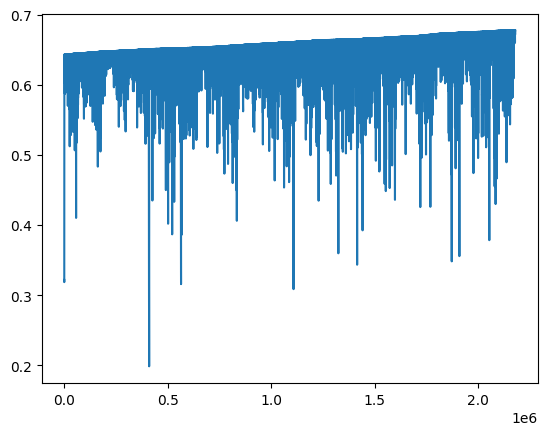

In [12]:
plt.plot(logs['asset_position'])

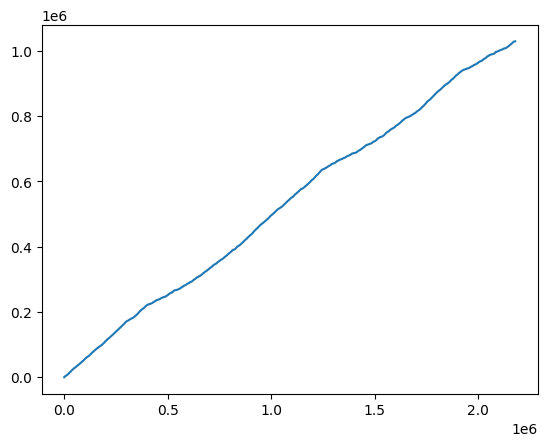

In [13]:
plt.plot(logs['volume(usd)'])

## BTC (fees = 0)

In [14]:
df = pd.read_csv('marketdata/lob_btcusdt_Binance_Spot.csv')

### Retard strat (only hold 500 USD in asset)

In [15]:
logs = run_simulation(ZeroStrategy(prepare_df(df, mode='btcusdt'), 0), mode='btcusdt')

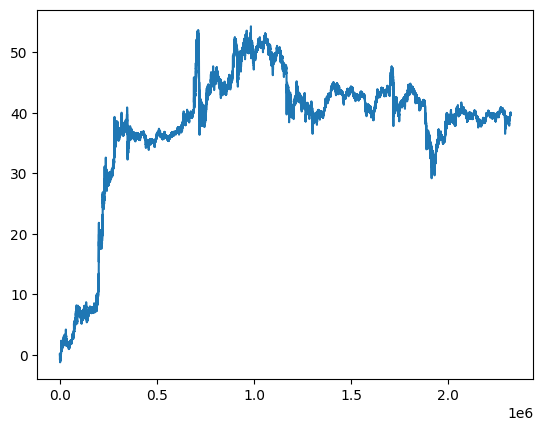

In [16]:
plt.plot(logs['pnl'])

### My strat

In [17]:
logs = run_simulation(LGBM(prepare_df(df, mode='btcusdt'), 0, mode='btcusdt'), mode='btcusdt')

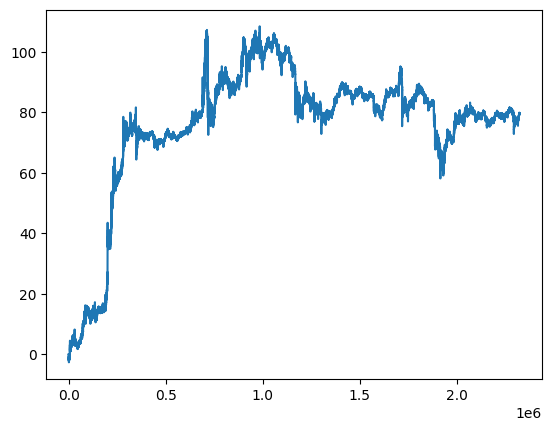

In [18]:
plt.plot(logs['pnl'])

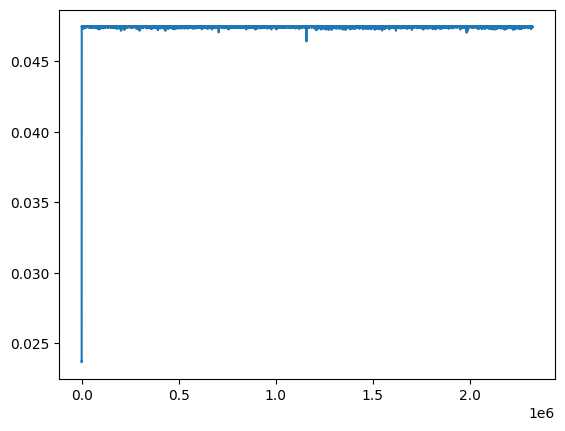

In [19]:
plt.plot(logs['asset_position'])

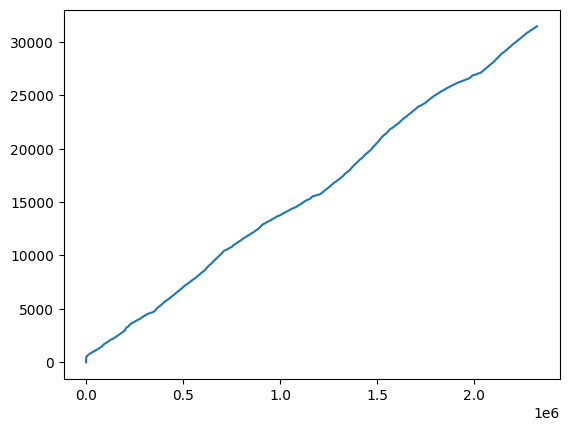

In [20]:
plt.plot(logs['volume(usd)'])